In [48]:
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns
from matplotlib import pyplot as plt

In [49]:
def loader(file, is_number = False):
    data = []
    with open(file, encoding="utf8") as my_file:
        data = my_file.read().splitlines()
    if is_number:
        data = [int(i) for i in data]
    return data

In [50]:
test_data = loader("data/test_text.txt")
test_labels = loader("data/test_labels.txt", True)
val_data = loader("data/val_text.txt")
val_labels = loader("data/val_labels.txt", True)
train_data = loader("data/train_text.txt")
train_labels = loader("data/train_labels.txt", True)
mappings = {0:"anger", 1:"joy", 2:"optimism",3:	"sadness"}

In [51]:
test = pd.DataFrame({"text":test_data, "label":test_labels, "emotion":[mappings[i] for i in test_labels]})
val = pd.DataFrame({"text":val_data, "label":val_labels, "emotion":[mappings[i] for i in val_labels]})
train = pd.DataFrame({"text":train_data, "label":train_labels, "emotion":[mappings[i] for i in train_labels]})

In [52]:
test.head()

,text,label,emotion
0,#Deppression is real. Partners w/ #depressed p...,3,sadness
1,@user Interesting choice of words... Are you c...,0,anger
2,My visit to hospital for care triggered #traum...,3,sadness
3,@user Welcome to #MPSVT! We are delighted to h...,1,joy
4,What makes you feel #joyful?,1,joy


In [53]:
val.head()

,text,label,emotion
0,"@user @user Oh, hidden revenge and anger...I r...",0,anger
1,if not then #teamchristine bc all tana has don...,0,anger
2,Hey @user #Fields in #skibbereen give your onl...,0,anger
3,Why have #Emmerdale had to rob #robron of havi...,0,anger
4,@user I would like to hear a podcast of you go...,0,anger


In [54]:
train.head()

,text,label,emotion
0,“Worry is a down payment on a problem you may ...,2,optimism
1,My roommate: it's okay that we can't spell bec...,0,anger
2,No but that's so cute. Atsu was probably shy a...,1,joy
3,Rooneys fucking untouchable isn't he? Been fuc...,0,anger
4,it's pretty depressing when u hit pan on ur fa...,3,sadness


In [55]:
df = pd.concat([train, test, val])
df = shuffle(df, random_state=100).reset_index(drop=True)

In [56]:
df

,text,label,emotion
0,"bad news fam, life is still hard and awful #de...",3,sadness
1,@user cyber bully,0,anger
2,@user @user Amal Clooney should try to prosecu...,0,anger
3,@user I did that! 3 days later my order isn't ...,0,anger
4,@user @user Hell hath no fury like a women s...,0,anger
...,...,...,...
5047,Ask yourself this:\nIf the algae appears to be...,0,anger
5048,A liar an a bully for president? They say ever...,0,anger
5049,“He who is slow to anger is better than the mi...,2,optimism
5050,@user it can go one of two ways. You either ge...,0,anger


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     5052 non-null   object
 1   label    5052 non-null   int64 
 2   emotion  5052 non-null   object
dtypes: int64(1), object(2)
memory usage: 118.5+ KB


In [58]:
df["emotion"].value_counts()

anger       2118
sadness     1326
joy         1163
optimism     445
Name: emotion, dtype: int64

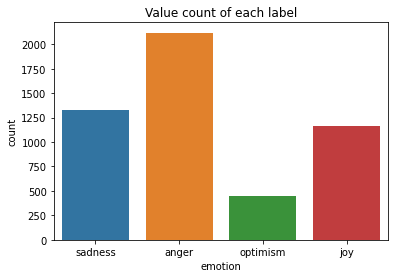

In [59]:
ax = sns.countplot(x="emotion", data=df)
ax.set_title("Value count of each label")
plt.show()